In [6]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
# loading the csv data to a Pandas DataFrame
murder_data = pd.read_csv('Data/Violent/VICTIM_OF_MURDER_0.csv')

In [57]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = murder_data.groupby('YEAR')['Total'].sum()
state_wise = murder_data.groupby('STATE/UT')['Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

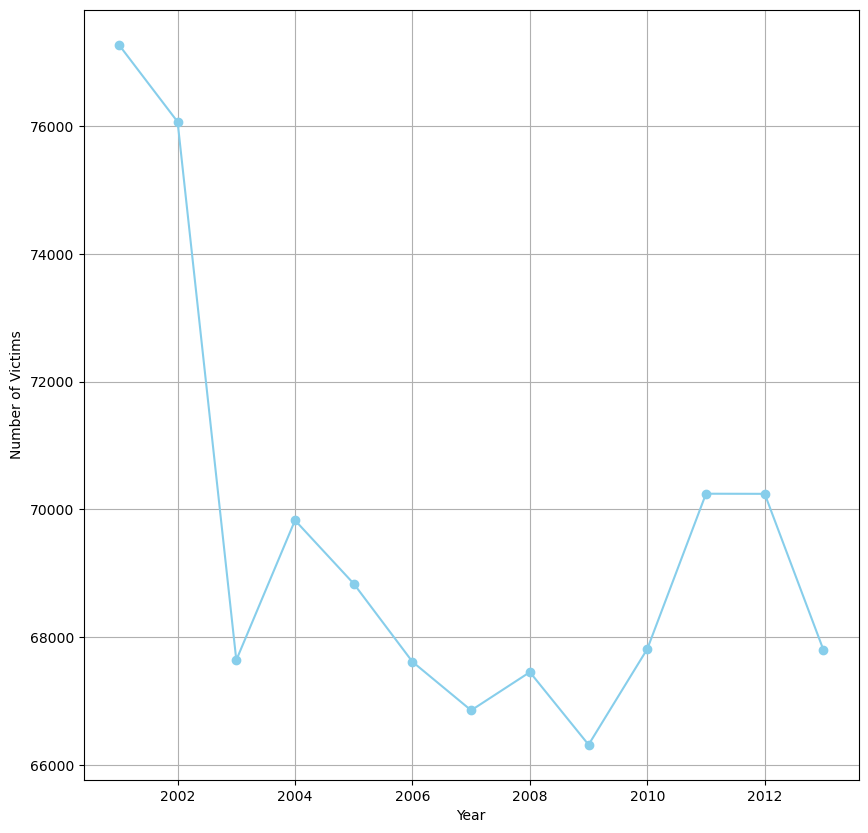

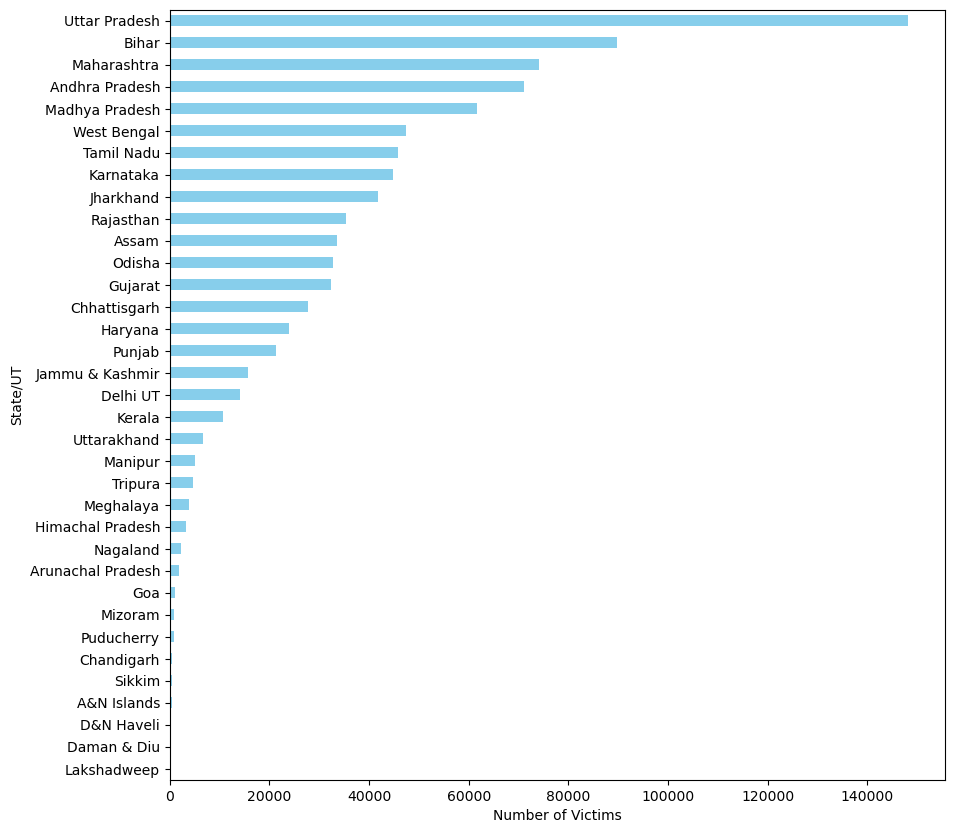

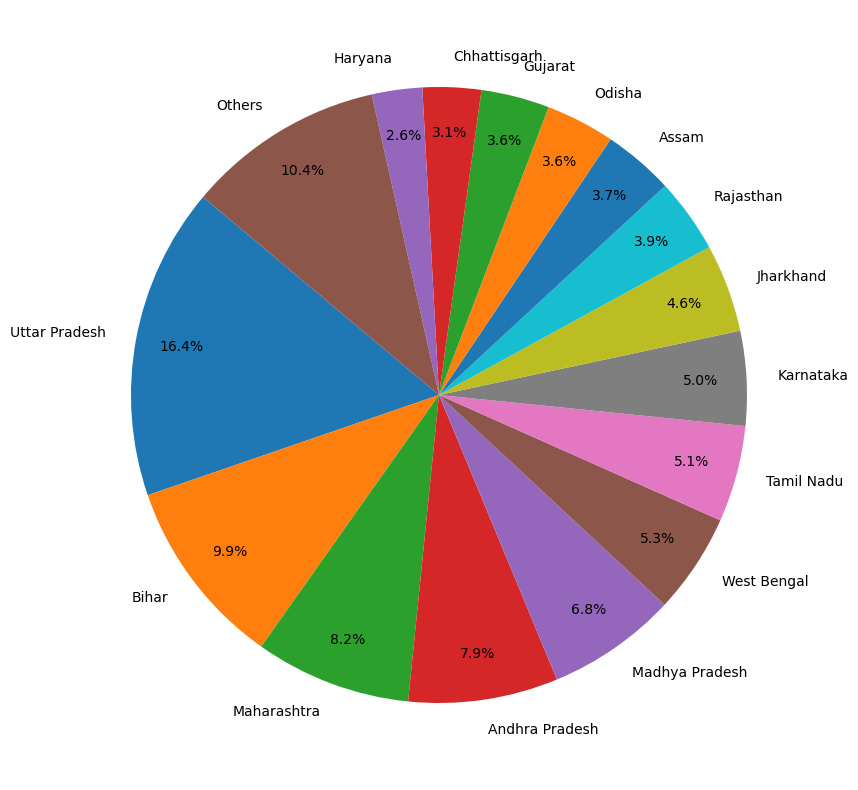

In [64]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()



<Figure size 1000x1000 with 0 Axes>

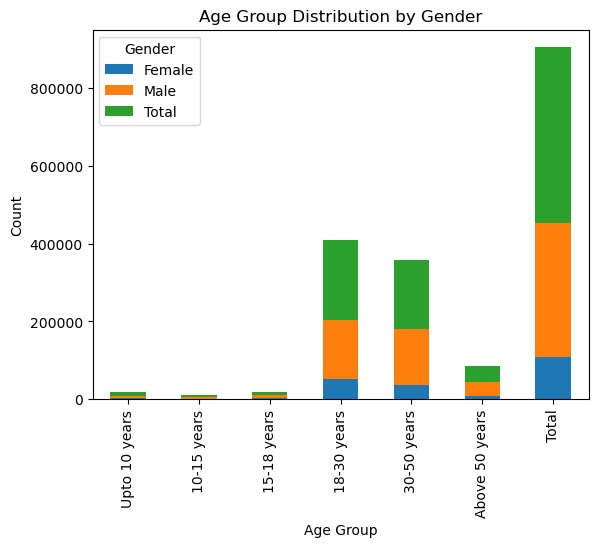

In [78]:
# Stacked Bar Chart
gender_totals = murder_data.drop(columns=['YEAR'], errors='ignore')
gender_totals = gender_totals.groupby("GENDER").sum(numeric_only=True)
plt.figure(figsize=(10, 10))
gender_totals.T.plot(kind='bar', stacked=True)
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

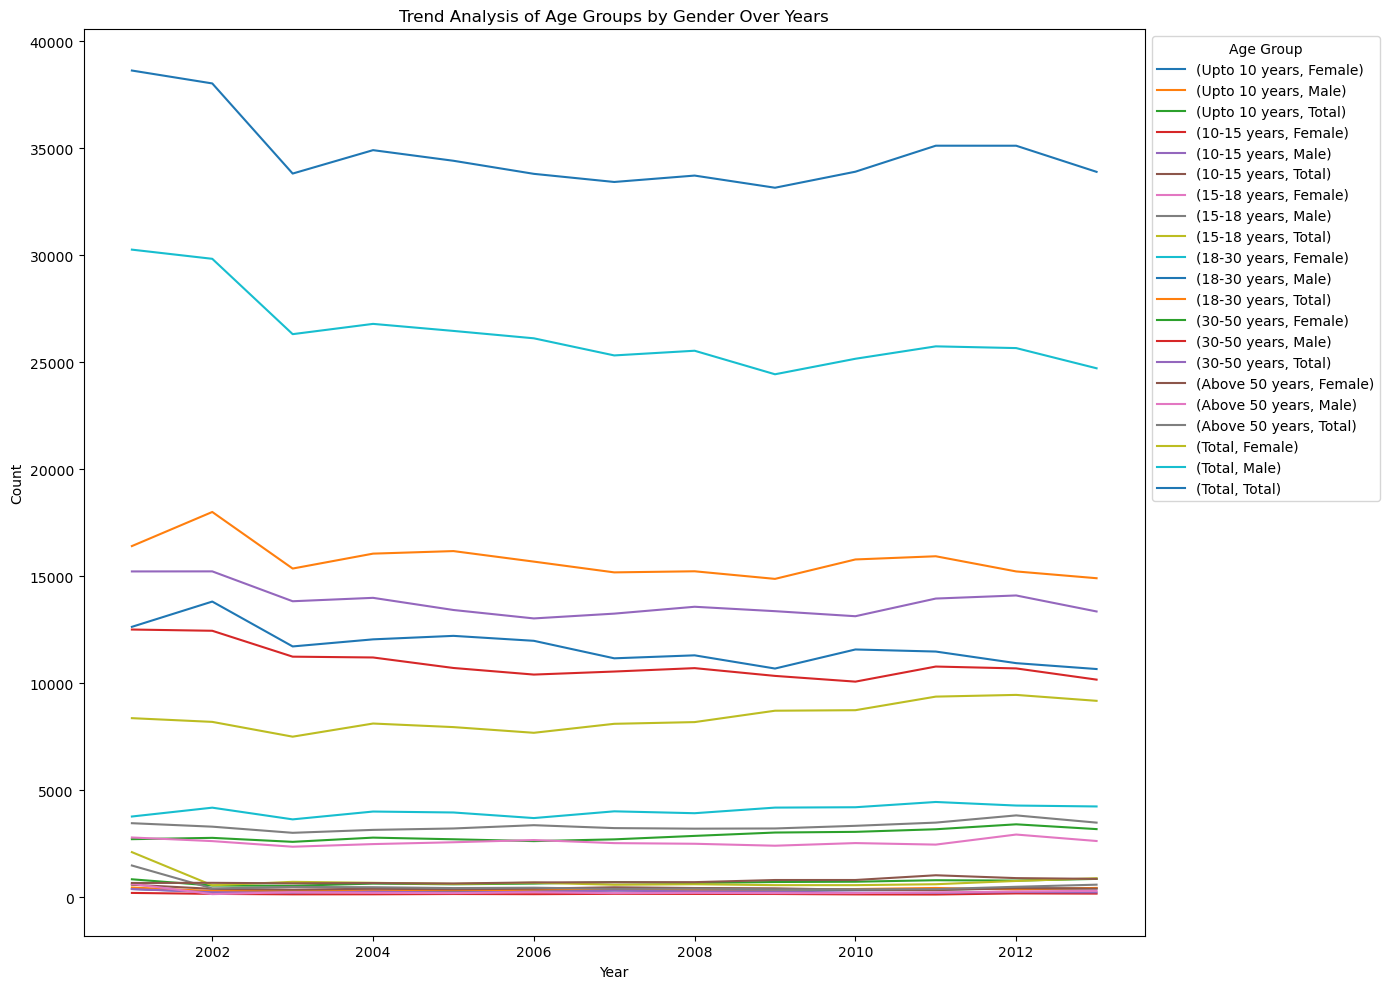

In [91]:
if 'YEAR' in murder_data.columns:
    # Aggregate data to avoid duplicates
    murder_data_grouped = murder_data.groupby(['YEAR', 'GENDER']).sum(numeric_only=True).reset_index()

    # Set index and unstack for plotting
    murder_data_grouped.set_index(['YEAR', 'GENDER']).unstack().plot(kind='line', figsize=(14, 10))

    # Set titles and labels
    plt.title('Trend Analysis of Age Groups by Gender Over Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()
else:
    print("Column 'YEAR' does not exist in the DataFrame.")

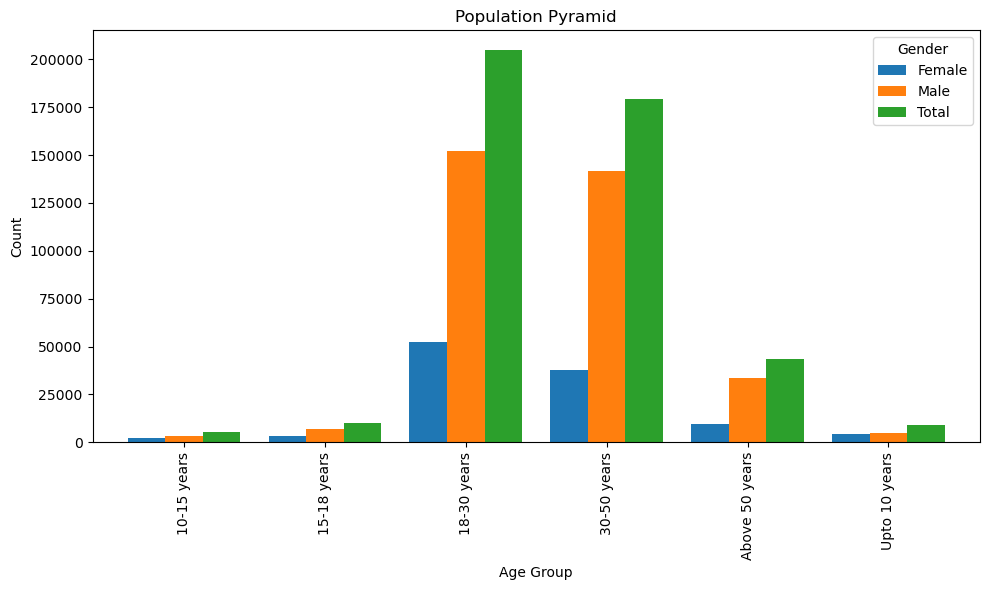

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure of your DataFrame
# murder_data = pd.read_csv('your_data.csv')  # Load your data

# Pivot the DataFrame to have age groups as index and genders as columns
pivot_data = murder_data.pivot_table(index='GENDER', 
                                      values=['Upto 10 years', '10-15 years', 
                                              '15-18 years', '18-30 years', 
                                              '30-50 years', 'Above 50 years'], 
                                      aggfunc='sum')

# Transpose the pivoted DataFrame for plotting
pivot_data = pivot_data.T

# Create the population pyramid
pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set titles and labels
plt.title('Population Pyramid')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Adjust legend position
plt.legend(title='Gender', loc='upper right')

plt.tight_layout()  # Adjust layout
plt.show()


In [4]:

# convert xlsx to csv
import pandas as pd

def convert_xlsx_to_csv(file_path):
    data_xls = pd.read_excel(file_path, index_col=None)
    data_xls.to_csv(file_path.replace('.xlsx', '.csv'), encoding='utf-8', index=False)

if __name__ == '__main__':
    convert_xlsx_to_csv('India_Population_2001_to_2023.xlsx')

In [3]:
!pip install openpyxl